## 확률적 경사 하강법

### 손실함수
* 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준

In [3]:
# fish_csv_data 파일에서 데이터프레임 만들기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_target = fish['Species']

In [5]:
# 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
from sklearn.linear_model import SGDClassifier

In [10]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))  # 학습 데이터 정확도
print(sc.score(test_scaled, test_target))    # 테스트 데이터 정확도

0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [11]:
# partial_fit() 호출 후 다시 훈련세트 테스트세트 점수 확인
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


In [13]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [14]:
#300번의 에포크 동안 훈련 반복 진행
# 반복마다 훈련세트와 테스트세트 점수계산 train_score, test_score에 추가
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

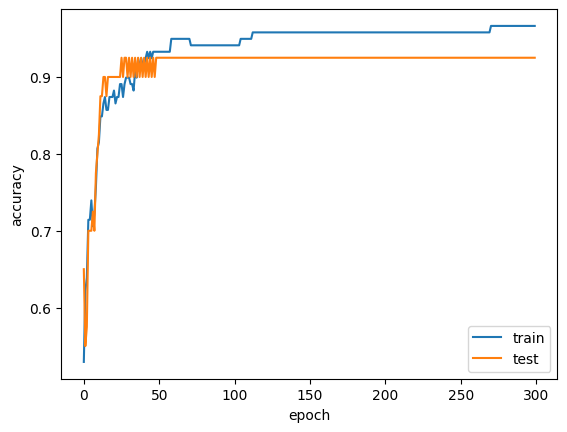

In [16]:
# 그래프 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [19]:
# SGDClassifier 학습
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [21]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
